In [1]:
from numpy import *
from GRpy.all import *
init_printing()
%matplotlib inline
#init_printing(use_latex='mathjax')

In [3]:
t, x0, r, th, phi = symbols('t, x^0, r, theta, varphi',positive=True , real=True)
m,a = symbols('m,a', positive = True)
ut, omega, v, p2 = symbols('u_t, omega, v, p2', real=True)
M = Symbol('M', real=True)
s = Symbol('s', real=True)
S = Symbol('S', real=True)
pt = Function(r'p_t')(s)
pr = Function(r'p_r')(s)
ptheta = Function(r'p_{\theta}')(s)
pphi = Function(r'p_{\phi}')(s)
st = Function(r'S^t')(s)
sr = Function(r'S^r')(s)
stheta = Function(r'S^{\theta}')(s)
sphi = Function(r'S^{\phi}')(s)

In [4]:
sigma = r**2 + (a*cos(th))**2
delta = r**2 - 2*m*r + a**2

In [5]:
g = Metric((x0, r, th, phi))
g[-0,-0] = (1-(2*m*r/sigma))
g[-0,-1] = 0
g[-0,-2] = 0
g[-0,-3] = (2*a*m*r*sin(th)**2)/sigma
g[-1,-0] = 0
g[-1,-1] = -sigma/delta
g[-1,-2] = 0
g[-1,-3] = 0
g[-2,-0] = 0
g[-2,-1] = 0
g[-2,-2] = -sigma
g[-2,-3] = 0
g[-3,-0] = (2*a*m*r*sin(th)**2)/sigma
g[-3,-1] = 0
g[-3,-2] = 0
g[-3,-3] = -(r**2 +a**2 + (2*a**2*m*r*sin(th)**2)/sigma)*sin(th)**2

In [6]:
ginv = g.invert()
chris = Christoffel(g)
riem = Riemann(chris)

In [7]:
def dw(A,mu):
    downvector=0
    for nu in range(4):
        downvector += g.components[(-mu,-nu)]*A[nu]
    
    return simplify(downvector.subs(th,pi/2))

def down(A):
    return [dw(A,mu) for mu in range(4)]

def uw(A,mu):
    upvector=0
    for nu in range(4):
        upvector += ginv.components[(mu,nu)]*A[nu]
    
    return simplify(upvector.subs(th,pi/2))

def up(A):
    return [uw(A,mu) for mu in range(4)]

def norma(A,n):
    norma=0
    if n==1:
        for mu in range(4):
            norma += A[mu]*up(A)[mu]
            
        return simplify(norma)
    
    if n==0:
        for mu in range(4):
            norma += A[mu]*down(A)[mu]
            
        return simplify(norma)
    
    else:
        print('escriba 1 para down, y 0 para up')

In [8]:
sup=[0,0,S/r,0]
pdown=[pt,pr,ptheta,pphi]

sdown=down(sup)
pup=up(pdown)

In [9]:
uupnonorm=[ut,0,0,omega*ut]

N=0
for i in range(4):
    for j in range(4):
        N += g.components[(-i,-j)]*uupnonorm[i]*uupnonorm[j]
        
eq=1-N.subs(th,pi/2)

utnorm=solve(eq,ut)[1]
uphinorm=omega*utnorm
uup=[simplify(utnorm),0,0,simplify(uphinorm)]
udown=down(uup)

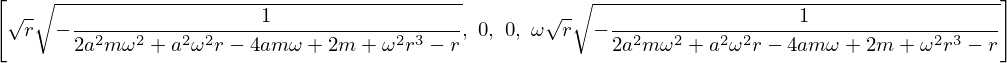

In [10]:
uup

In [11]:
def ac(alpha):
        aceleration=0
        for mu in range(4):
            for nu in range(4):
                aceleration+=chris.components[(alpha,-mu,-nu)].subs(th,pi/2)*uup[mu]*uup[nu]
                
        return simplify(aceleration)
    
aup=[ac(mu) for mu in range(4)]

In [35]:
arcosta=simplify(aup[1].subs(a,0))

In [13]:
def lcup(i,j,k,l):
    return -LeviCivita(i,j,k,l)/(r**2)

def lcdown(i,j,k,l):
    return r**2*LeviCivita(i,j,k,l)

In [25]:
def termino(mu):
    termino=0
    for nu in range(4):
        for alpha in range(4):
            for beta in range(4):
                for sigma in range(4):
                    for gamma in range(4):
                        termino += -lcdown(mu,nu,gamma,sigma)*chris.components[(nu,-alpha,-beta)]*uup[sigma]*uup[alpha]*sup[gamma]*uup[beta]
                        
    return termino

Masa=0
for mu in range(4):
    Masa += pup[mu]*udown[mu]

def p(mu):
    A=Masa*udown[mu]+termino(mu)
    return simplify(A.subs(th,pi/2))

momentum=[p(mu) for mu in range(4)]

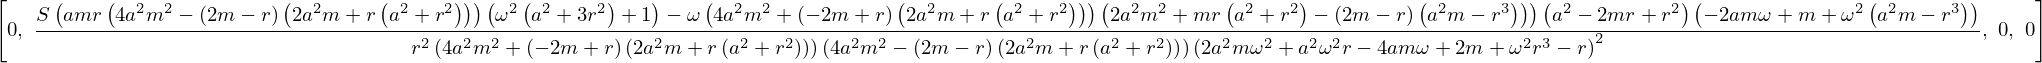

In [27]:
def dphideq(mu):
    dphid=0
    for alpha in range(4):
        for beta in range(4):
            dphid+=chris.components[(alpha,-mu,-beta)]*termino(alpha)*uup[beta]
            
    return simplify(dphid.subs(th,pi/2))

dphid=[dphideq(mu) for mu in range(4)]

dphid

In [36]:
dphidrcosta=simplify(dphid[1].subs(a,0))

In [37]:
frcosta=hs(1).subs(a,0)

In [39]:
eq=simplify(M*arcosta+dphidrcosta-frcosta)

In [40]:
solve(eq,omega)

KeyboardInterrupt: 

In [30]:
def htensor(mu,nu):
    htensor=0
    for gamma in range(4):
        for lamda in range(4):
            for alpha in range(4):
                for sigma in range(4):
                    htensor += -(-1/2)*lcdown(gamma,lamda,mu,alpha)*riem.Riemann_par.components[(gamma,lamda,-nu,-sigma)]*uup[alpha]*uup[sigma]
                    
    return simplify(htensor.subs(th,pi/2))

In [31]:
def ch(mu):
    ch=0
    for i in range(4):
        for j in range(4):
            ch += -chris.components[(i,-mu,-j)]*uup[j]*pdown[i]
        
    return simplify(ch.subs(th,pi/2))

def hs(mu):
    hs=0
    for nu in range(4):
        hs += htensor(nu,mu)*sup[nu]
        
    return simplify(hs)

def dpmu(mu):
    return simplify(diff(pdown[mu],s)+ch(mu)+hs(mu))

dpmu=[dpmu(0),dpmu(1),dpmu(2),dpmu(3)]

In [32]:
c2=0
for i in range(4):
    for j in range(4):
        for k in range(4):
            c2 += chris.components[(i,-j,-k)]*sdown[i]*uup[j]*uup[k]
            
def c3(mu):
    c=0
    for i in range(4):
        for j in range(4):
            c += chris.components[(mu,-i,-j)]*sup[i]*uup[j]
    
    return c

def dsmu(mu):
    A=c3(mu)+uup[mu]*c2
    B=simplify(A.subs(th,pi/2))
    return diff(sup[mu],s)+B
    
dsmu=[dsmu(0),dsmu(1),dsmu(2),dsmu(3)]

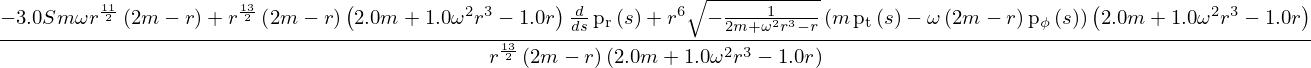

In [18]:
simplify(dpmu[1].subs(a,0))

In [19]:
dsmu

In [16]:
dpmu2=[dpmu[0],dpmu[1],dpmu[3]]
psol=dsolve(dpmu2)

#dsmu2=[dsmu[0],dsmu[1],dsmu[3]]
#ssol=dsolve(dsmu2)

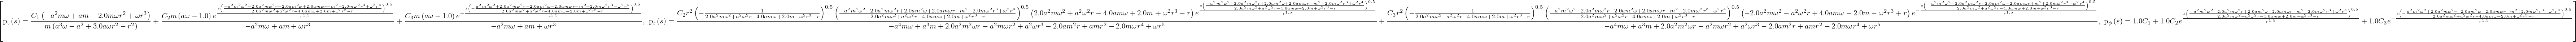

In [17]:
psol

In [18]:
condicion=0
for i in range(4):
    condicion += sup[i]*udown[i]

La condución a satisfacer es:

In [19]:
simplify(condicion)

In [20]:
del(ptheta)
ptheta = Symbol('p_theta', real=True)

pdownsol = [psol[0].rhs, psol[1].rhs, ptheta, psol[2].rhs]
pupsol=up(pdownsol)

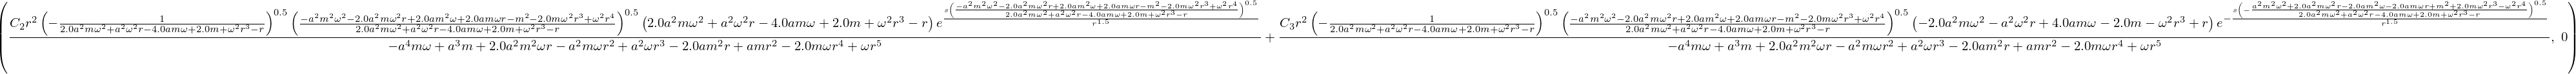

In [22]:
pdownsol[1], momentum[1]

In [23]:
pdownsol[2], momentum[2]

De la componente $1$ o $r$ podemos notar que $C_2$ y $C_3$ en la solución del momentum deben ser 0 para que pueda satisfacerse la igualdad, mientras que de la componente $2$ o $\theta$ damos cuenta que para que $p^{\theta}$ es 0.

Así, las soluciones para el momentum y el spín deben tener la forma:
\begin{align}
p_{\mu} &= \left[ \frac{p_{\phi} \left(- a^{2} m \omega + a m - 2 m \omega r^{2} + \omega r^{3}\right)}{m \left(a^{3} \omega - a^{2} + 3 a \omega r^{2} - r^{2}\right)}, \  0, \  0, \  p_{\phi}\right],\\
S^{\mu} &= [0,0,\frac{S}{r},0].
\end{align}

In [24]:
del(pphi)
pphi = Symbol('p_phi', real=True)

pmu=[pphi*(a*m-a**2*m*omega-2*m*omega*r**2+omega*r**3)/(m*(a**3*omega-a**2+3*a*omega*r**2-r**2)),0,0,pphi]

def t(mu):
    termino=0
    
    for nu in range(4):
        for alpha in range(4):
            for beta in range(4):
                for sigma in range(4):
                    for gamma in range(4):
                        termino += -lcdown(mu,nu,gamma,sigma)*chris.components[(nu,-alpha,-beta)]*uup[sigma]*uup[alpha]*sup[gamma]*uup[beta]
                        
    return termino
                        

Masa2=0
for mu in range(4):
    Masa2 += pmu[mu]*uup[mu]

def p2(mu):
    A=Masa2*udown[mu]+t(mu)
    return simplify(A.subs(th,pi/2))

pmu2=[p2(mu) for mu in range(4)]

In [25]:
0==pmu[1], pmu[1]==pmu2[1], 0==pmu[2], pmu[2]==pmu2[2]

(True, True, True, True)

De esta forma probamos que las componentes $r,\theta$ son iguales luego de aplicar la condición, ahora haremos lo mismo con las componentes $t,\phi$.

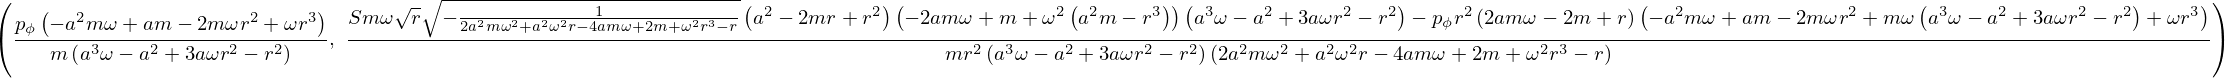

In [26]:
pmu[0],simplify(pmu2[0])

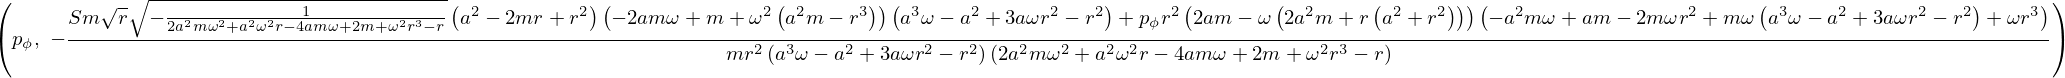

In [27]:
pmu[3],simplify(pmu2[3])

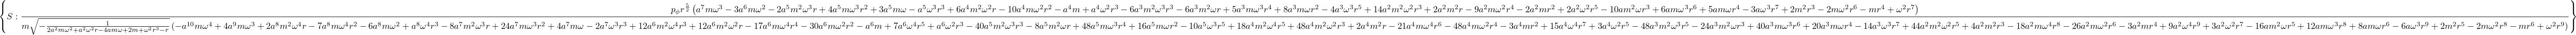

In [28]:
eq1=pmu[0]-simplify(pmu2[0])
eq2=pmu[3]-simplify(pmu2[3])
eqtotal=[eq1,eq2]

solve(eqtotal,[S,pphi])

Mostrando así que la componente $\phi$ del momentum y la componente $\theta$ del espín están relacionados como:

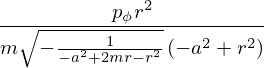

In [29]:
spin=solve(eq1, S)[0]
simplify(spin.subs(omega,a/(a**2+r**2)))

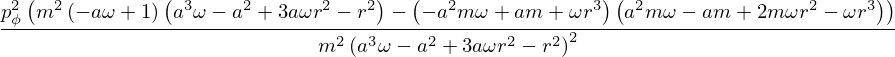

In [30]:
pcuadrado=0
for mu in range(4):
    pcuadrado+=pmu[mu]*up(pmu)[mu]
    
pp=simplify(pcuadrado)

pp

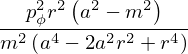

In [31]:
simplify(pp.subs(omega,a/(a**2+r**2)))

In [32]:
omega1=simplify(solve(pp,omega)[0])
omega2=simplify(solve(pp,omega)[1])

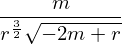

In [33]:
simplify(omega1.subs(a,0))

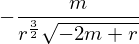

In [34]:
simplify(omega2.subs(a,0))

In [35]:
spin=simplify(solve(eq1,S)[0])

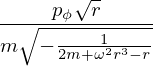

In [36]:
simplify(spin.subs(a,0))

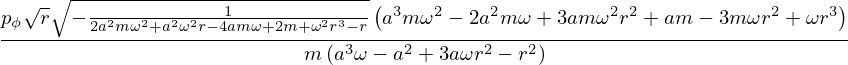

In [37]:
masavel=0
for mu in range(4):
    masavel+=pmu[mu]*uup[mu]
    
mv=simplify(masavel)

mv

In [38]:
pphimasa=solve(M-mv,pphi)[0]

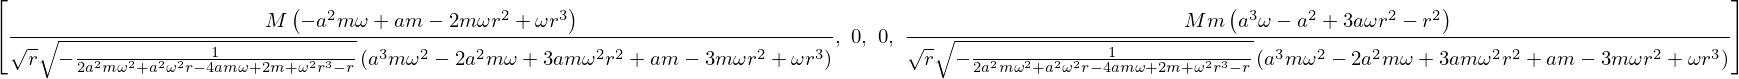

In [39]:
pdownmasa=[simplify(pmu[0].subs(pphi,pphimasa)),0,0,simplify(pmu[3].subs(pphi,pphimasa))]
pdownmasa

In [40]:
pcuadradomasa=0
for mu in range(4):
    pcuadradomasa+=pdownmasa[mu]*up(pdownmasa)[mu]
    
ppm=simplify(pcuadradomasa)

In [41]:
spinupmasa=[0,0,simplify(spin.subs(pphi,pphimasa))/r,0]

In [42]:
print(latex(pdownmasa))

\left[ \frac{M \left(- a^{2} m \omega + a m - 2 m \omega r^{2} + \omega r^{3}\right)}{\sqrt{r} \sqrt{- \frac{1}{2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r}} \left(a^{3} m \omega^{2} - 2 a^{2} m \omega + 3 a m \omega^{2} r^{2} + a m - 3 m \omega r^{2} + \omega r^{3}\right)}, \  0, \  0, \  \frac{M m \left(a^{3} \omega - a^{2} + 3 a \omega r^{2} - r^{2}\right)}{\sqrt{r} \sqrt{- \frac{1}{2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r}} \left(a^{3} m \omega^{2} - 2 a^{2} m \omega + 3 a m \omega^{2} r^{2} + a m - 3 m \omega r^{2} + \omega r^{3}\right)}\right]


In [43]:
print(latex(spinupmasa))

\left[ 0, \  0, \  \frac{M r \left(2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r\right)}{a^{3} m \omega^{2} - 2 a^{2} m \omega + 3 a m \omega^{2} r^{2} + a m - 3 m \omega r^{2} + \omega r^{3}}, \  0\right]


El momentum y spin son:
\begin{align}
p_{\mu} &= \left[ \frac{M \left(- a^{2} m \omega + a m - 2 m \omega r^{2} + \omega r^{3}\right)}{\sqrt{r} \sqrt{- \frac{1}{2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r}} \left(a^{3} m \omega^{2} - 2 a^{2} m \omega + 3 a m \omega^{2} r^{2} + a m - 3 m \omega r^{2} + \omega r^{3}\right)}, \  0, \  0, \  \frac{M m \left(a^{3} \omega - a^{2} + 3 a \omega r^{2} - r^{2}\right)}{\sqrt{r} \sqrt{- \frac{1}{2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r}} \left(a^{3} m \omega^{2} - 2 a^{2} m \omega + 3 a m \omega^{2} r^{2} + a m - 3 m \omega r^{2} + \omega r^{3}\right)}\right]\\
S^{\mu} &= \left[ 0, \  0, \  \frac{M r \left(2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r\right)}{a^{3} m \omega^{2} - 2 a^{2} m \omega + 3 a m \omega^{2} r^{2} + a m - 3 m \omega r^{2} + \omega r^{3}}, \  0\right],
\end{align}
donde $M := p_{\mu}u^{\mu}$.

In [44]:
def aceleracion(mu):
    aup=0
    for alpha in range(4):
        for beta in range(4):
            aup+=chris.components[(mu,-alpha,-beta)].subs(th,pi/2)*uup[alpha]*uup[beta]
            
    return simplify(aup)

aup=[aceleracion(mu) for mu in range(4)]

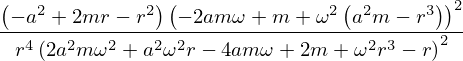

In [45]:
norma(aup,0)

In [46]:
print(latex(norma(aup,0)))

\frac{\left(- a^{2} + 2 m r - r^{2}\right) \left(- 2 a m \omega + m + \omega^{2} \left(a^{2} m - r^{3}\right)\right)^{2}}{r^{4} \left(2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r\right)^{2}}


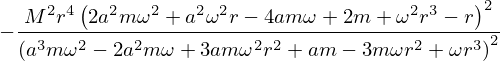

In [47]:
norma(spinupmasa,0)

In [48]:
print(latex(norma(spinupmasa,0)))

- \frac{M^{2} r^{4} \left(2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r\right)^{2}}{\left(a^{3} m \omega^{2} - 2 a^{2} m \omega + 3 a m \omega^{2} r^{2} + a m - 3 m \omega r^{2} + \omega r^{3}\right)^{2}}


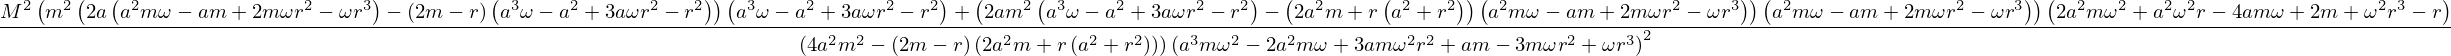

In [49]:
normap=norma(pdownmasa,1)
normap

In [50]:
print(latex(normap))

\frac{M^{2} \left(m^{2} \left(2 a \left(a^{2} m \omega - a m + 2 m \omega r^{2} - \omega r^{3}\right) - \left(2 m - r\right) \left(a^{3} \omega - a^{2} + 3 a \omega r^{2} - r^{2}\right)\right) \left(a^{3} \omega - a^{2} + 3 a \omega r^{2} - r^{2}\right) + \left(2 a m^{2} \left(a^{3} \omega - a^{2} + 3 a \omega r^{2} - r^{2}\right) - \left(2 a^{2} m + r \left(a^{2} + r^{2}\right)\right) \left(a^{2} m \omega - a m + 2 m \omega r^{2} - \omega r^{3}\right)\right) \left(a^{2} m \omega - a m + 2 m \omega r^{2} - \omega r^{3}\right)\right) \left(2 a^{2} m \omega^{2} + a^{2} \omega^{2} r - 4 a m \omega + 2 m + \omega^{2} r^{3} - r\right)}{\left(4 a^{2} m^{2} - \left(2 m - r\right) \left(2 a^{2} m + r \left(a^{2} + r^{2}\right)\right)\right) \left(a^{3} m \omega^{2} - 2 a^{2} m \omega + 3 a m \omega^{2} r^{2} + a m - 3 m \omega r^{2} + \omega r^{3}\right)^{2}}


In [51]:
omega1=solve(normap,omega)[2]

In [52]:
omega2=solve(normap,omega)[3]

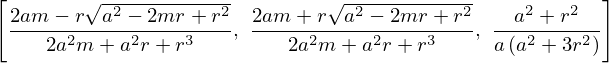

In [53]:
solve(pphimasa**2,omega)

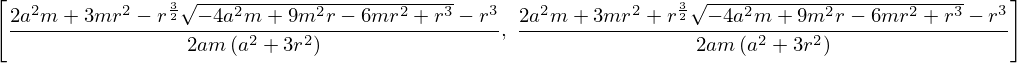

In [54]:
solve(mv**2,omega)

In [55]:
print(latex(simplify(norma(aup,0).subs(omega,omega1))))

\frac{m^{2} \left(- a^{2} + 2 m r - r^{2}\right)}{r^{4} \left(m^{2} - 2 m r + r^{2}\right)}


In [56]:
print(latex(simplify(norma(spinupmasa,0).subs(omega,omega1))))

\frac{M^{2} r^{4} \left(- m^{2} + 2 m r - r^{2}\right)}{m^{2} \left(a^{2} - 2 m r + r^{2}\right)}


In [57]:
print(latex(simplify(normap.subs(omega,omega1))))

0


In [58]:
print(latex(simplify(norma(aup,0).subs(omega,omega2))))

\frac{m^{2} \left(- a^{2} + 2 m r - r^{2}\right)}{r^{4} \left(m^{2} - 2 m r + r^{2}\right)}


In [59]:
print(latex(simplify(norma(spinupmasa,0).subs(omega,omega2))))

\frac{M^{2} r^{4} \left(- m^{2} + 2 m r - r^{2}\right)}{m^{2} \left(a^{2} - 2 m r + r^{2}\right)}


In [60]:
print(latex(simplify(normap.subs(omega,omega2))))

0


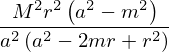

In [61]:
simplify(normap.subs(omega,a/(a**2+r**2)))

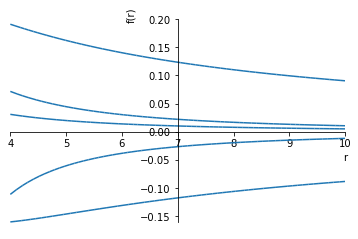

In [81]:
omegacosta=a/(a**2+r**2)
omegamin=solve(1/(uup[0]**2/r),omega)[0]
omegamax=solve(1/(uup[0]**2/r),omega)[1]

y1=omega1.subs(m,1).subs(a,1/2)
y2=omega2.subs(m,1).subs(a,1/2)
y3=omegacosta.subs(m,1).subs(a,1/2)

plot(y1,y2,y3,omegamin.subs(m,1).subs(a,1/2),omegamax.subs(m,1).subs(a,1/2),(r,4,10))

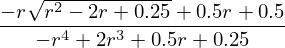

In [88]:
simplify(omega1.subs(m,1).subs(a,1/2))

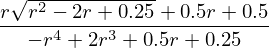

In [89]:
simplify(omega2.subs(m,1).subs(a,1/2))

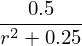

In [90]:
simplify(omegacosta.subs(m,1).subs(a,1/2))

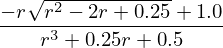

In [91]:
simplify(omegamin.subs(m,1).subs(a,1/2))

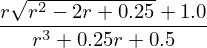

In [92]:
simplify(omegamax.subs(m,1).subs(a,1/2))